In [56]:
# This is the analysis as well
# Import the required libraries here
import pandas as pd
import numpy as np

# Import the graphical packages
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import shap

# Import the machine learning libraries here 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Import model assessment libraries here 
from sklearn.metrics import classification_report, confusion_matrix

# Model improvement and parameter optimisation
from sklearn.model_selection import GridSearchCV

In [33]:
# Import the data
#df = pd.read_csv("ilrData.csv")
df = pd.read_csv("final_data.csv")

In [34]:
#############################  Exp;loratory data analysis ##########################
# Explore the data here 
df.head(2)
#df.tail()
#df.shape
#df.info()
#df.describe()
#df.isna().sum()
#df.shape

,Unnamed: 0,Age,Gender,Symptoms,Solus_Diagnosis,Outcome,Indication,Cause,Concern,diagnosis,AgeGroup,Gender_male_1,Symptoms_yes_1,Presentation,Diagnosis,arrhythmia
0,0,75,M,No,Collapse,RIP,Collapse,others,Syncope,Yes,≥ 65,1,0,1,AF,0
1,1,40,M,Yes,SVT,EP study,Palpitations,arrhythmia,Other,Yes,31 - 64,1,1,0,SVT,1


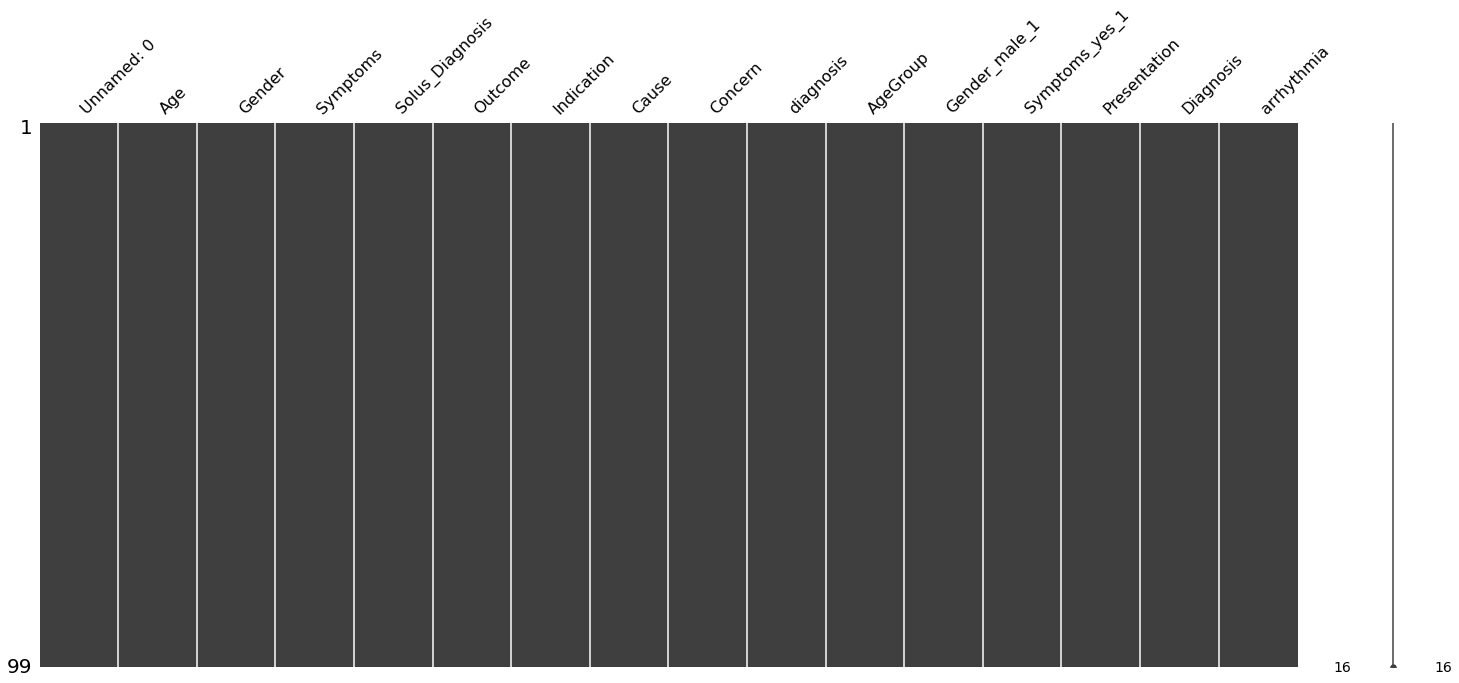

In [35]:
# Visualise all the missing data 
# A bar graph of the missing data
#msn.heatmap(df);
msn.matrix(df)
#msn.dendrogram(df)
# Save the figure to the figure folder
#plt.savefig("Figure/missingData.png")
plt.savefig("Figure/enginearedFeature.jpeg")

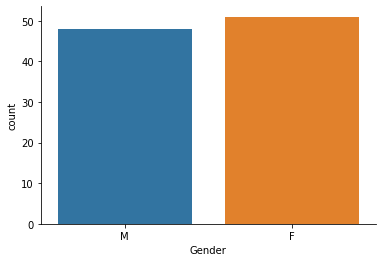

In [36]:
# Perform some basic visualisation 
sns.countplot(x="Gender", data=df)
sns.despine()
plt.savefig("Figure/GenderCount.jpeg")

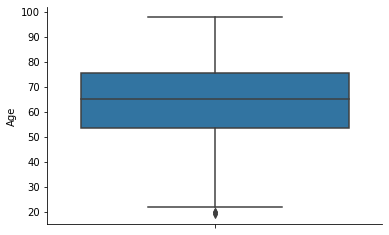

In [37]:
plt.Figure(figsize=(10,5))
sns.boxplot(y = "Age",data=df);
sns.despine()
plt.savefig("Figure/AgeBoxplot.jpeg")

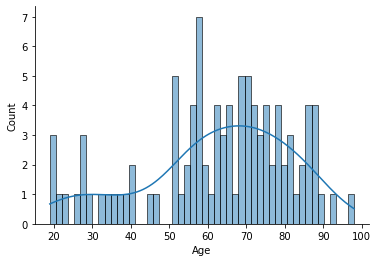

In [38]:
# A histogram showing the distribution of the age here 
sns.histplot(data=df, x='Age', bins=50, kde=True);
sns.despine()
plt.savefig("Figure/AgeDistribution.jpeg")

In [30]:
df.columns

Index(['Age', 'Gender', 'Symptoms', 'Solus_Diagnosis', 'Outcome', 'Indication',
       'Cause', 'Concern', 'diagnosis', 'AgeGroup', 'Gender_male_1',
       'Symptoms_yes_1', 'Presentation', 'Diagnosis'],
      dtype='object')

In [32]:
df.Solus_Diagnosis

0                   Collapse
1                        SVT
2                      pause
3       No abnormal findings
4       No abnormal findings
               ...          
94    No abnormal arrhythmia
95                       SVT
96                       SVT
97                       SVT
98                        AF
Name: Solus_Diagnosis, Length: 99, dtype: object

In [31]:
# Create a new feature that looks at only syncope or others as the concern before 
# Symptoms presented before the 
lst = []
for i in df["Indication"]:
    if "syncope" in i.lower() or "collapse" in i.lower():
        lst.append("Syncope")
    else:
        lst.append("Other")

# Underlying cause of the Syncope 
lst1 = []
lst2 = "SVT AF NSVT flutter tachycardia bradycardia AT VT pause SR(SVEs) AV-block".split()
for item in df["Solus-Diagnosis"]:
    if item in lst2:
        lst1.append("arrhythmia")
    else:
        lst1.append("others")
        
# Feature enginearing of the Daignosis (Success of the ILR)
diagnosis = []
for j in df["Solus_Diagnosis"]:
    if j.lower() == "no abnormal findings" or j.lower() == "no notes":
        diagnosis.append('No')
    elif j.lower() == "undersensing" or j.lower() == "signal issue":
        diagnosis.append("Failure")
    else:
        diagnosis.append("Yes")   
        
ageGroup = []
for age in df["Age"]:
    if age <= 30:
        ageGroup.append("≤ 30")
    elif age > 30 and age <= 64:
        ageGroup.append("31 - 64")
    else:
        ageGroup.append("≥ 65")

KeyError: 'Solus-Diagnosis'

In [14]:
# Add teh engineared features to the dataframe here
df["Cause"] = lst1  
df["Concern"] = lst
df["diagnosis"] = diagnosis
df["AgeGroup"] = ageGroup

# Create the dummy variables here for categorical variables for further analysis in Scipy and sklearn
df["Gender_male_1"] = pd.get_dummies(df['Gender'], drop_first=True)
df["Symptoms_yes_1"] = pd.get_dummies(df['Symptoms'], drop_first=True)
df["Presentation"] = pd.get_dummies(df["Concern"], drop_first=True)

# Export the processed file here for analysis in r
df.to_csv("ilr_processed.csv")

ValueError: Length of values (0) does not match length of index (99)

In [41]:
Diagnosis = []
af = "AT, AF PAF".split()
svt = "NSVT, NSVT , SVT,".split()
for case in df["Solus_Diagnosis"]:
    if case.strip().upper() in af:
        Diagnosis.append("AF")
    elif case.upper() in svt:
        Diagnosis.append("SVT")
    elif case.lower() == "flutter":
        Diagnosis.append("Atrial Flutter")
    elif case == 'High grade AV block and intermittent sinus arrest':
        Diagnosis.append("AV-block")
    else:
        Diagnosis.append(case)
        
arrhythmia = []
for cause in df["Cause"]:
    if cause == "arrhythmia":
        arrhythmia.append(1)
    else:
        arrhythmia.append(0)
        


In [42]:
df['Diagnosis'] = Diagnosis
df['arrhythmia'] = arrhythmia
df.head()
# Export the processed file here for analysis in r
#df.to_csv("ilr_processed.csv")

,Unnamed: 0,Age,Gender,Symptoms,Solus_Diagnosis,Outcome,Indication,Cause,Concern,diagnosis,AgeGroup,Gender_male_1,Symptoms_yes_1,Presentation,Diagnosis,arrhythmia
0,0,75,M,No,Collapse,RIP,Collapse,others,Syncope,Yes,≥ 65,1,0,1,Collapse,0
1,1,40,M,Yes,SVT,EP study,Palpitations,arrhythmia,Other,Yes,31 - 64,1,1,0,SVT,1
2,2,88,F,Yes,pause,PPM,Syncope,arrhythmia,Syncope,Yes,≥ 65,0,1,1,pause,1
3,3,68,M,Yes,Others,No outcome,Collapse and dizziness,others,Syncope,No,≥ 65,1,1,1,Others,0
4,4,73,F,Yes,Others,No outcome,Syncope,others,Syncope,No,≥ 65,0,1,1,Others,0


In [43]:
# Prepare the data for machine learning here 
x = df[['Age','Gender_male_1','Presentation']]
X = df[['Age','Gender_male_1','Presentation']].values
y = df['arrhythmia'].values

In [11]:
# Export the processed file here for analysis in r
df.to_csv("final_Data.csv")

In [44]:
# Build the model here 
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Initialise the classifiers here
svm = SVC() 
rf = RandomForestClassifier()
lgr = LogisticRegression()

# Build models here 
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
lgr.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Predict with the models built here
y_predict_svm = svm.predict(X_test)
y_predict_rf = rf.predict(X_test)
y_predict_lgr = lgr.predict(X_test)

In [46]:
# Implement a grid search to optimse the SVM predictors 
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# May take awhile!
grid.fit(X_train,y_train)

# print the best paramters here
print (grid.best_params_)

# Rerun the svm with the best parameters here 
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

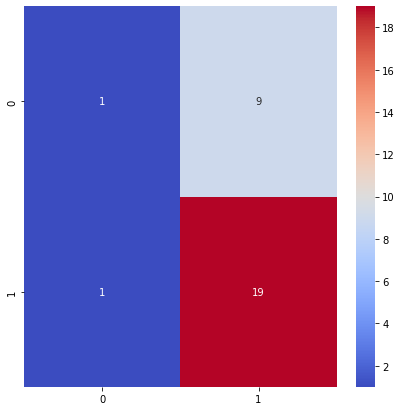

In [47]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,grid_predictions), annot=True, cmap="coolwarm");

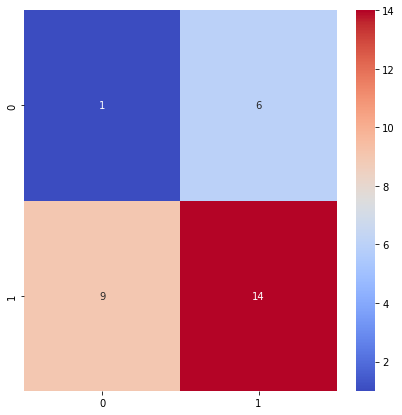

In [51]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_predict_rf, y_test),annot=True, cmap="coolwarm");

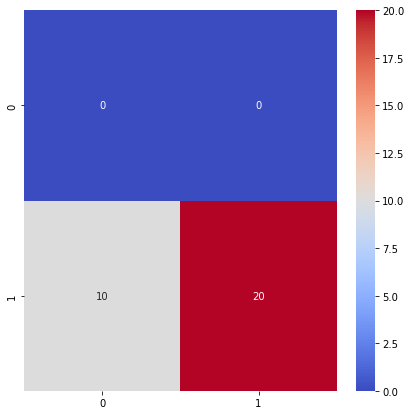

In [52]:
# Assess the performance of the models here
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_predict_lgr, y_test), annot=True,cmap="coolwarm");

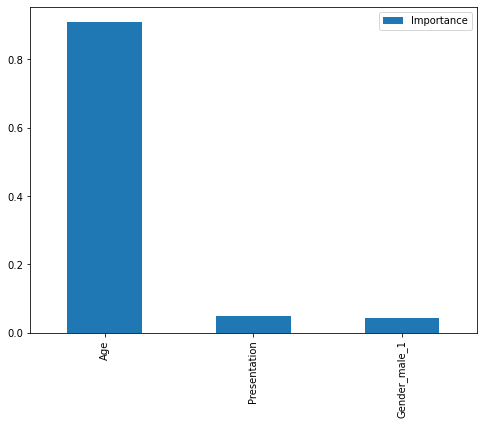

In [53]:
feat_importances = pd.DataFrame(rf.feature_importances_,index=x.columns,columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6));

In [59]:
from sklearn import datasets, metrics, model_selection, svm

In [61]:
print (classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.68      0.95      0.79        20

    accuracy                           0.67        30
   macro avg       0.59      0.53      0.48        30
weighted avg       0.62      0.67      0.58        30



In [62]:
print (classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.14      0.10      0.12        10
           1       0.61      0.70      0.65        20

    accuracy                           0.50        30
   macro avg       0.38      0.40      0.38        30
weighted avg       0.45      0.50      0.47        30



In [63]:
print (classification_report(y_test, y_predict_lgr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.67      1.00      0.80        20

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [22]:
df.groupby("Gender").agg(
{
    "Cause": ["value_counts"],
    "Concern":["value_counts"]
})

Cause      Concern
                  value_counts value_counts
Gender                                     
F      Other               NaN         17.0
       Syncope             NaN         34.0
       arrhythmia         31.0          NaN
       others             20.0          NaN
M      Other               NaN         16.0
       Syncope             NaN         32.0
       arrhythmia         30.0          NaN
       others             18.0          NaN

In [23]:
df[["Age","Cause","Concern"]].value_counts()

Age  Cause       Concern
68   others      Syncope    3
62   arrhythmia  Syncope    3
51   arrhythmia  Other      3
58   arrhythmia  Syncope    3
75   arrhythmia  Syncope    2
                           ..
56   arrhythmia  Other      1
54   arrhythmia  Syncope    1
                 Other      1
53   others      Syncope    1
98   arrhythmia  Other      1
Length: 80, dtype: int64

In [24]:
avg = df["Age"].mean()
medianAge = df["Age"].mean()
min_val = df["Age"].min()
max_val = df["Age"].max()
iqr = df["Age"].describe()["75%"] - df["Age"].describe()["25%"]

In [97]:
print (f"Patients below 30 years old with syncope {round(7/55*100,0)}")
print (f"Patients 31-64 years old with syncope {round(17/55*100,0)}")
print (f"Patients above 65 years old with syncope {round(31/55*100,0)}")

Patients below 30 years old with syncope 13.0
Patients 31-64 years old with syncope 31.0
Patients above 65 years old with syncope 56.0


In [25]:
df.groupby("Indication")["Age"].mean()

Indication
Chest discomfort and tachycardia                       26.000000
Chest pain                                             54.000000
Collapse                                               75.000000
Collapse and dizziness                                 68.000000
Collapses                                              85.000000
Dizziness                                              70.000000
Dizziness and loss of balance                          78.000000
If AF caused the stroke                                41.000000
No notes                                               72.500000
Palpitations                                           52.384615
Palpitations and dizziness                             62.000000
Palpitations, dizziness                                55.500000
Palpitations, presyncope, peripartum cardiomyopathy    39.000000
Presyncope                                             68.666667
Stroke                                                 64.000000
Stroke, look f